# Kapitel 1 - Einleitung

# *Was kann man eigentlich alles so machen mit den Daten einer Wetterstation?*

Willkommen!

In diesem Tutorial schauen wir uns die Daten einer Wetterstation "um die Ecke" an. Am Ende wirst du einige Fragen über das Wetter or Ort beantworten, die du dir vielleicht auch schonmal gestellt hast:
- Wie warm ist es eigentlich im Durchschnitt so in Leipzig?
- Wie verändert sich die Temperatur normalerweise im Laufe des Jahres?
- Was sind die Hitze- und Kälterekorde?
- Können wir anhand der Daten einer einzelnen Wetterstation den Klimawandel erkennen? Können wir ablesen, wie viel es pro Jahr im Durchschnitt wärmer wird?
- Wenn wir die heutige Temperatur kennen, können wir dann vorhersagen, wie warm es morgen wird?
- Auf welcher Zeitskala ändert sich die Temperatur am stärksten im Laufe der Zeit? Sind die Temperaturunterschiede zwischen einzelnen Tagen größer als die Unterschiede zwischen verschiedenen Jahren

Unterwegs lernst du hoffentlich auch eine Menge: 
- Wo finde ich überhaupt Wetter-Beobachtungsdaten? Muss ich die etwa selber messen?! (Spoiler: zum Glück meistens nicht)
- Worauf muss man aufpassen wenn man mit Messdaten arbeitet? 
- Wenn ich Beobachtungen gemacht habe - wie kann ich überlegen, ob ich wirklich das gemessen habe, was ich wollte? Oder gab es Störeffekte, die die Messung beeinflusst haben (Messfehler, abgelenkte Forscher, statistisches Rauschen, ...)
- Viele schlaue Wörter, um nerdy Mitschüler und/oder Lehrer zu beeindrucken: "Regression", "Korrelation" und "Autokorrelation", "Spektrale Leistungsdichte", "Klimatologie"

Falls dir später irgendwas unklar ist, melde dich gerne!

# 1. Die Daten.

Wettervorhersagen kann man sich ja ständig anschauen im Internet. Aber um das Wetter vorherzusagen, muss man ja erst mal wissen, wie jetzt gerade das Wetter ist. Woher wissen Wetterdienste und Websites wie Google oder Weather.com das eigentlich? Fallen dir Methoden ein, mit denen man Daten sammeln könnte, die uns helfen, herauszufinden, wie das Wetter gerade ist? Falls ja, schreibe gerne ein paar Ideen in das nächste Feld (Doppelklick auf das Feld, damit du es bearbeiten kannst):

Idee 1:

Idee 2:

Idee 3:

Noch mehr?

Ob du richtig lagst, kannst du überprüfen, indem du dir dieses kurzen Videos des Deutschen Wetterdiensts anschaust: https://www.youtube.com/watch?v=E-Kf68P-aCM.

Ist also ein ganz schöner Aufwand dafür, dass die Wettervorhersage trotzdem oft daneben liegt! Aber wie in dem Video gesagt wird: früher war es noch viel schlechter! Heute kennen wir das Wetter in 6 Tagen so genau, wie unsere Großeltern damals das Wetter am nächsten Tag - ist doch mal ein Fortschritt!

## 1.1 Daten herunterladen.

Der Deutsche Wetterdienst hat eine Website, auf der man sich Wetterdaten herunterladen kann: https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/

Deine Aufgabe ist es jetzt zunächst, auf dieser Website passende Wetterdaten zu suchen. 

Welche Daten wir suchen:
- Tägliche Durchschnittswerte
- Wir brauchen Temperaturwerte, die finden sich unter dem Stichwort `kl`
- Um den Klimawandel beobachten zu können brauchen wir lange Zeitreihen. Deshalb wäre es gut, "historische" Zeitreihen herunterzuladen.

Wenn du alles richtig gemacht hast, bist du jetzt in einem Ordner, in dem es eine Datei gibt, die `KL_Tageswerte_Beschreibung_Stationen.txt` heißt. In dieser Datei sind alle Wetterstationen aufgelistet, zusammen mit Informationen über die Daten (alphabetisch sortiert). 

Am besten schauen wir uns die Station "Leipzig/Halle" an. Wichtig ist vor allem, dass die Station schon eine lange Zeitreihe besitzt - manche Stationen wurden erst vor kurzem aufgestellt, oder irgendwann abgebaut, die haben wahrscheinlich zu wenige Daten um alle Fragen beantworten zu können, die wir haben. Wenn du die Station gefunden hast, notiere dir (oder merke dir, wenn du ein gutes Gedächtnis hast ;)) die Zahl, die für deine Station in der Spalte `Stations_id` steht. 

Dann gehe zurück in den Ordner, aus dem du gekommen bist. Dort liegen viele Dateien, deren Namen ungefähr so aussehen: `tageswerte_KL_012345_12345678_12345678_hist.zip`. Die erste Zahl im Namen ist die `Stations_id`, die du dir aufgeschrieben hast. Suche deine Station und lade dann die Daten herunter, indem du auf den Namen drückst.

Die heruntergeladene Datei ist eine `.zip` Datei, du man erst "auspacken" muss. Wenn du weißt, wie das geht, kannst du das direkt machen, sonst frag kurz um Hilfe :)

## 1.2 Daten auf die Website hochladen (und anschauen!)

Die Daten kannst du jetzt hier hochladen damit wir sie anschauen und auswerten können. Dazu kannst du einfach Den "ausgepackten" Ordner mit Wetterdaten anklicken und in das linke Fenster ziehen (dorthin wo die ganzen Kapitel aufgelistet sind).

Du könntest dir die Dateien auch direkt an deinem PC anschauen... aber das sind nur lange, langweilige Tabellen.

Ab jetzt werden wir öfter Programmiercode ausführen. Dazu kannst du einfach das entsprechende Feld anklicken und gleichzeitig "Shift" und "Enter" Drücken (Shift ist die Taste unter der "Enter" Taste) - wenn das nicht klappt, sag Bescheid.

Wenn das Hochladen funktioniert hat, können wir jetzt die Daten einlesen:

In [1]:
# Programmierbibliotheken importieren

import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

Im nächsten Block musst du einmal deinen Ordnernamen eintragen - und den Namen der Datei, die wir anschauen sollten - ein Beispiel steht als Kommentar nach dem "#" Zeichen. 

Wichtig: weder die Anführungszeichen am Anfang und Ende, noch den Schrägstrich "/" löschen, und die Dateiendung nicht vergessen, die sollte ".txt" sein!

In [2]:
d = pd.read_csv(
    "DeinOrdnerName/DeinDateiname",  # "tageswerte_KL_01234_12345678_12345678_hist/produkt_klima_tag_12345678_12345678_01234.txt"
    sep=";",
    skipinitialspace=True,
)

data = xr.DataArray(d["TMK"], coords={"time": d["MESS_DATUM"]})
data["time"] = pd.to_datetime(data.time, format="%Y%m%d")

Wenn das geklappt hat, sollte ein kleiner grüner Haken unten links in der Zelle stehen, und unsere Daten sind jetzt in der Variablen `data` gespeichert. Wenn nicht, gibt es eine Fehlermeldung.

Und damit können wir den Computer die Daten zum ersten Mal zeichnen lassen (nennt sich "plotten", daher kommt der Name der Funktion `plot()` im Programmiercode):

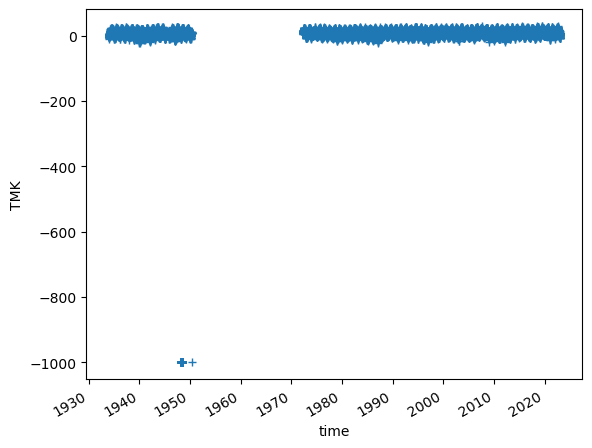

In [3]:
data.plot(linestyle="none", marker="+")
plt.show()

Das sieht vermutlich erst mal ein bisschen komisch aus.

Ein paar Kurze Fragen zu der Abbildung:

Frage: Was ist auf den Achsen dargestellt und welche Einheiten werden wahrscheinlich benutzt? ("TMK" ist das Tagesmittel der Lufttemperatur in 2m Höhe)

Antwort x-Achse: 

Antwort y-Achse:

Frage: Warum könnte zu machen Zeitpunkten `-999` für die Temperatur eingetragen worden sein?

Antwort:

Frage: Was könnte ein Grund dafür sein, dass es eine "Lücke" in den Daten gibt?

Antwort:

Frage: Ab welchem Jahr (ungefähr) scheint es keine "Lücke" mehr zu geben?

Antwort:

Damit uns die "Lücke" in den Daten nicht stört, können wir uns nur die Daten ab einem bestimmten Zeitpunkt anschauen.

Dazu kannst du im folgenden Programmiercode `YYYY` durch eine Jahreszahl ersetzen, ab der es keine Lücke mehr gibt

In [6]:
subset_data = data.sel(time=slice(np.datetime64("YYYY-01-01"), None))

Auswahl anschauen:

In [ ]:
subset_data.plot()
plt.show()

Du kannst die Zellen auch öfter als einmal ausführen lassen -  einfach nochmal anklicken und dann die selben Tasten drücken wie beim ersten Mal. Suche dir eine untere Schwelle, mit dem du zufrieden bist - ein Jahr mehr oder weniger ist für den Rest nicht so wichtig - nur super viel wegschneiden solltest du nicht.

Das sind immer noch ganz schön viele Daten! Um es ein bisschen übersichtlicher zu haben, können wir uns ein einzelnes Jahr aussuchen... such dir eins aus - wie wär's zum Beispiel mit dem, in dem du geboren bist? Wenn du dich entschieden hast, ersetze `YYYY` durch das Jahr das dich interessiert und `XXXX` durch das anschließende Jahr (also zB 2000 und 2001).

In [25]:
subset_year = data.sel(
    time=slice(np.datetime64("YYYY-01-01"), np.datetime64("XXXX-01-01"))
)

In [3]:
subset_year.plot()
plt.show()

Beschreibe die Kurve die du siehst in ein bis zwei Sätzen!

Antwort:

Wenn du dir die Durchschnittstemperatur an einem bestimmten Datum anschauen willst kannst du das auch machen, indem du unten `YYYY` durch die Jahreszahl ersetzt, `MM` durch den Monat und `TT` durch den Tag. Achtung: Wenn Tag und Monat nur eine Stelle haben, musst du das mit einer 0 am Anfang schreiben - also `01-01` statt `1-1` für Neujahr!

In [ ]:
data.sel(time=np.datetime64("YYYY-MM-TT"))

Wenn du hier angekommen bist kannst du zu [Kapitel 2](Kapitel-2-Datenanalyse.ipynb) weiter gehen - dort schauen wir uns die Daten ein bisschen mehr im Detail an.